# AED c/ Python
---

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
plt.style.use ('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# leitura da base e visualização inicial
dataset = pd.read_csv("Levels_Fyi_Salary_Data.csv")
dataset
# dataset.head() nos mostra os primeiros 5 registros
# dataset.tail() nos mostra os últimos 5 registros

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [7]:
# visualizando a estrutura do dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [8]:
# seleção de colunas a serem usadas nas análises
dataset = dataset[['company',
                   'title',
                   'basesalary',
                   'bonus',
                   'stockgrantvalue',
                   'totalyearlycompensation',
                   'yearsofexperience',
                   'yearsatcompany',
                   'gender',
                   'Race',
                   'Education',
                   'location']]
dataset.head()

,company,title,basesalary,bonus,stockgrantvalue,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education,location
0,Oracle,Product Manager,107000.0,10000.0,20000.0,127000,1.5,1.5,NaN,NaN,NaN,"Redwood City, CA"
1,eBay,Software Engineer,0.0,0.0,0.0,100000,5.0,3.0,NaN,NaN,NaN,"San Francisco, CA"
2,Amazon,Product Manager,155000.0,0.0,0.0,310000,8.0,0.0,NaN,NaN,NaN,"Seattle, WA"
3,Apple,Software Engineering Manager,157000.0,35000.0,180000.0,372000,7.0,5.0,NaN,NaN,NaN,"Sunnyvale, CA"
4,Microsoft,Software Engineer,0.0,0.0,0.0,157000,5.0,3.0,NaN,NaN,NaN,"Mountain View, CA"


In [ ]:
# correção do nome das colunas
dataset.columns = ['company',
                   'title',
                   'base_salary',
                   'bonus',
                   'stock_grant_value',
                   'total_yearly_compensation',
                   'years_of_experience',
                   'years_at_company',
                   'gender',
                   'race',
                   'education',
                   'location']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company                    62637 non-null  object 
 1   title                      62642 non-null  object 
 2   base_salary                62642 non-null  float64
 3   bonus                      62642 non-null  float64
 4   stock_grant_value          62642 non-null  float64
 5   total_yearly_compensation  62642 non-null  int64  
 6   years_of_experience        62642 non-null  float64
 7   years_at_company           62642 non-null  float64
 8   gender                     43102 non-null  object 
 9   race                       22427 non-null  object 
 10  education                  30370 non-null  object 
 11  location                   62642 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 5.7+ MB


In [9]:
# verificação e eliminação de duplicatas do dataframe
print("Há {0} duplicatas na base".format(dataset.duplicated().sum()))

dataset.drop_duplicates(inplace=True)

print("\nNúmero de duplicatas após deleção: {0} \n".format(dataset.duplicated().sum()))

Há 655 duplicatas na base

Número de duplicatas após deleção: 0 



In [10]:
# verificando valores faltantes
total = np.product(dataset.shape)
missing = dataset.isna().sum().sum()
perc_missing = missing/total*100

print("Total faltante: {}".format(perc_missing.round(3))+'%')

Total faltante: 12.219%


In [11]:
# lidando com valores na/NaN/null (imputação)
dataset.fillna("Unknown", inplace=True)
dataset.isna().sum()

company                    0
title                      0
basesalary                 0
bonus                      0
stockgrantvalue            0
totalyearlycompensation    0
yearsofexperience          0
yearsatcompany             0
gender                     0
Race                       0
Education                  0
location                   0
dtype: int64

In [12]:
# ajuste nos nomes das empresas
dataset['company'] = dataset['company'].map(lambda x: x.lower()) # forma mais "pythonica"
#dataset['company'] = dataset['company'].str.lower() # forma mais simples

dataset['company'].value_counts().head(60).sort_index() # verificando a alteração e ordenando de forma crescente pelos nomes

accenture             355
adobe                 383
airbnb                228
amazon               8081
american express      134
apple                2036
atlassian             217
autodesk              131
bloomberg             503
broadcom              142
bytedance             169
capital one           780
cisco                 917
comcast               148
dell technologies     225
deloitte              397
dropbox               253
ebay                  361
epam systems          135
expedia               348
facebook             2952
goldman sachs         468
google               4316
ibm                   919
indeed                172
intel                 955
intuit                444
jpmorgan chase        535
linkedin              742
lyft                  318
microsoft            5191
netflix               267
nutanix               137
nvidia                404
oracle               1129
paypal                448
pinterest             136
qualcomm              567
salesforce  

In [13]:
# separando a coluna 'location' em 3 colunas 'city', 'state' e 'country'
dataset[['city','state/country']] = dataset['location'].str.split(',', n=1, expand=True)

# dividindo mais uma vez e verificando alteração
dataset[['state','country']] = dataset['state/country'].str.split(',', n=1, expand=True)
dataset['country'].value_counts()

 India               2820
 Canada              1792
 United Kingdom      1192
 Germany              574
 Singapore            372
                     ... 
 Yugoslavia             1
 Guatemala              1
 Marshall Islands       1
 Pakistan               1
 Egypt                  1
Name: country, Length: 80, dtype: int64

In [14]:
# iremos descartar as colunas 'location' e 'state/country'
dataset.drop(columns=['state/country','location'], inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61987 entries, 0 to 62641
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  61987 non-null  object 
 1   title                    61987 non-null  object 
 2   basesalary               61987 non-null  float64
 3   bonus                    61987 non-null  float64
 4   stockgrantvalue          61987 non-null  float64
 5   totalyearlycompensation  61987 non-null  int64  
 6   yearsofexperience        61987 non-null  float64
 7   yearsatcompany           61987 non-null  float64
 8   gender                   61987 non-null  object 
 9   Race                     61987 non-null  object 
 10  Education                61987 non-null  object 
 11  city                     61987 non-null  object 
 12  state                    61987 non-null  object 
 13  country                  9763 non-null   object 
dtypes: float64(5), int64(1

In [15]:
# preencheremos o país das cidades/estados estadunidenses, já que estava implícito
dataset['country'].fillna("United States of America", inplace=True)
dataset.country.value_counts()

United States of America    52224
 India                       2820
 Canada                      1792
 United Kingdom              1192
 Germany                      574
                            ...  
 Netherlands Antilles           1
 Marshall Islands               1
 Panama                         1
 Guatemala                      1
 Egypt                          1
Name: country, Length: 81, dtype: int64

In [16]:
# removendo espaços em branco das strings de cujas colunas separamos ('state' e 'country')
dataset['state'] = dataset['state'].str.strip()
dataset['country'] = dataset['country'].str.strip()
dataset['country'].value_counts()

United States of America    52224
India                        2820
Canada                       1792
United Kingdom               1192
Germany                       574
                            ...  
Netherlands Antilles            1
Marshall Islands                1
Panama                          1
Guatemala                       1
Egypt                           1
Name: country, Length: 81, dtype: int64

In [17]:
# correção de um único erro, na coluna 'gender' (gênero)
dataset['gender'].value_counts() # identificando o erro
dataset.loc[dataset['gender'] == 'Title: Senior Software Engineer'] # identificando a linha desse erro
dataset['gender'].replace({'Title: Senior Software Engineer': 'Unknown'}, inplace=True) # correção por substituição

In [18]:
# checagem
dataset['gender'].value_counts()

Male       35310
Unknown    19339
Female      6941
Other        397
Name: gender, dtype: int64

In [ ]:
# vamos analisar agora o salário base por cargo
# a mediana é mais apropriada para o caso
# para constatar, use a função do pandas pd.std() para ver o desvio padrão
# ou pd.var(), para a variância
df0 = dataset[['title','base_salary']].groupby('title').median().round(3).sort_values(by='base_salary', ascending=False)

df0

,base_salary
title,
Software Engineering Manager,176000.0
Technical Program Manager,159500.0
Product Manager,151000.0
Solution Architect,150000.0
Hardware Engineer,142000.0
Data Scientist,140000.0
Marketing,140000.0
Product Designer,140000.0
Software Engineer,135000.0


In [19]:
# gráfico de dispersão com o seaborn
ax = sns.catplot(data=dataset, y='title', x='base_salary')

# nomes dos eixos e título do gráfico (editados com a plt)
ax.set(xlabel='Base Salarial',
       title='Base Salarial por Cargo')

plt.ylabel('Cargo', rotation=0)

# display do gráfico
plt.show()

ValueError: Could not interpret value `base_salary` for parameter `x`

In [20]:
# análise de salário por cargo em cada empresa
df1 = dataset[['title','company', 'base_salary']].groupby(['title',
'company']).median().round(3).sort_values(by=['title',
                                              'base_salary',
                                              'company'],
                                          ascending=(True, False,True))

df1.reset_index(inplace=True) # transformando df1 em um dataframe simples

df1.loc[df1['title'] == 'Data Scientist'].tail(20)

KeyError: "['base_salary'] not in index"

In [ ]:
# análise de salário por cargo e anos de experiência
df2 = dataset[['title',
               'years_of_experience',
               'base_salary']].groupby(['title',
                                        'years_of_experience']).mean().round(3).sort_values(by=['title',
                                                                                                'base_salary',
                                                                                                'years_of_experience'],
                                                                                            ascending=(True, False,False))

df2.reset_index(inplace=True)

df2.loc[df2['title'] == 'Data Scientist']

,title,years_of_experience,base_salary
28,Data Scientist,30.0,250000.000
29,Data Scientist,22.0,208000.000
30,Data Scientist,25.0,201000.000
31,Data Scientist,21.0,200000.000
32,Data Scientist,19.0,200000.000
33,Data Scientist,15.0,191488.889
34,Data Scientist,12.0,174880.952
35,Data Scientist,16.0,174312.500
36,Data Scientist,23.0,172500.000
37,Data Scientist,11.0,170378.378


In [21]:
# há correlação entre anos de experiência e salário?
# verificando com um gráfico de dispersão (usando o seaborn)
sns.scatterplot(data=dataset, x= 'years_of_experience', y= 'base_salary')
plt.title('Salário Base vs Anos de Experiência')
plt.show()

ValueError: Could not interpret value `years_of_experience` for parameter `x`

In [22]:
# usando a correlação de Pearson
dataset[['years_of_experience','base_salary']].corr()

# por ter um coeficiente desprezível (perto de 0)
# consideramos que não há correlação entre essas variáveis

KeyError: "None of [Index(['years_of_experience', 'base_salary'], dtype='object')] are in the [columns]"

In [ ]:
# vamos analisar o salário por cargo e por região (cidade, estado e/ou país)
df3 = dataset[['title',
               'city',
               'state',
               'country',
               'base_salary']].groupby(['title',
                                        'city',
                                        'country']).median().round(3).sort_values(by=['title',
                                                                                      'base_salary',
                                                                                      'country'],
                                                                                  ascending=(True, False, True))

df3.reset_index(inplace=True)

df3.loc[(df3['city'] == 'New York') & (df3['title'] == 'Product Manager')]

,title,city,country,base_salary
1179,Product Manager,New York,United States of America,160000.0


In [ ]:
# função iloc, equivalente à função loc
# recebe índices, ao invés de nomes de colunas
dataset.iloc[0]

company                                        oracle
title                                 Product Manager
base_salary                                  107000.0
bonus                                         10000.0
stock_grant_value                             20000.0
total_yearly_compensation                      127000
years_of_experience                               1.5
years_at_company                                  1.5
gender                                        Unknown
race                                          Unknown
education                                     Unknown
city                                     Redwood City
state                                              CA
country                      United States of America
Name: 0, dtype: object

In [ ]:
# qual o número de funcionários para cada cargo?
dataset['title'].value_counts(normalize=True)

# 'normalize' torna a contagem em termos percentuais

Software Engineer               0.656993
Product Manager                 0.074838
Software Engineering Manager    0.057012
Data Scientist                  0.041234
Hardware Engineer               0.035265
Product Designer                0.024295
Technical Program Manager       0.022166
Solution Architect              0.018488
Management Consultant           0.015681
Business Analyst                0.014164
Marketing                       0.011438
Mechanical Engineer             0.007889
Sales                           0.007421
Recruiter                       0.007243
Human Resources                 0.005872
Name: title, dtype: float64

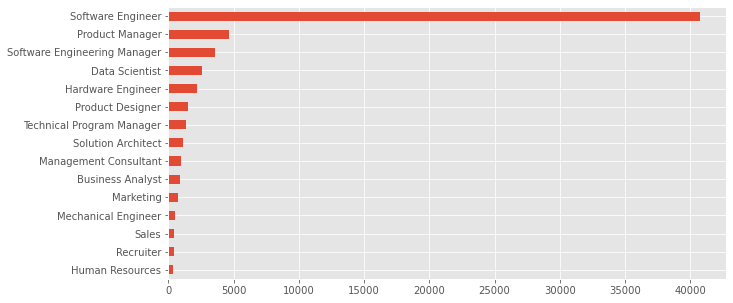

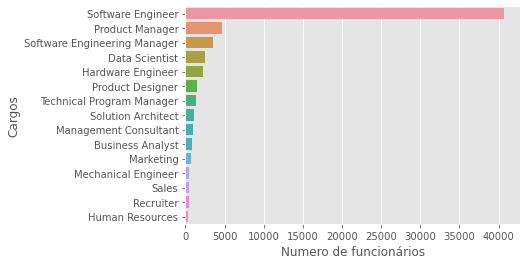

In [ ]:
# visualizando com o próprio python
# e depois, com o seaborn

# python
plt.figure(figsize=(10,5)) # define o tamanho da figura
dataset['title'].value_counts(ascending=True).plot(kind='barh')
plt.show()

print("")

# seaborn
ax = sns.countplot(data=dataset, y='title', order=dataset['title'].value_counts().index)
ax.set(xlabel= 'Numero de funcionários', ylabel= 'Cargos')
plt.show()

# de qual forma você achou mais prático construir o gráfico de barras?

In [ ]:
# quais as 10 empresas que possuem a maior quantidade de funcionários?
dataset['company'].value_counts().head(10)

amazon        8081
microsoft     5191
google        4316
facebook      2952
apple         2036
oracle        1129
salesforce    1061
intel          955
ibm            919
cisco          917
Name: company, dtype: int64

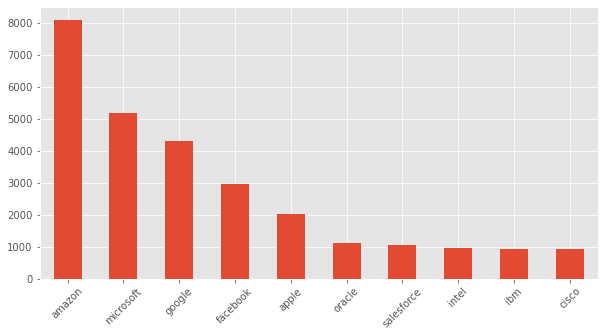

In [ ]:
# gráfico
plt.figure(figsize = (10,5))
dataset['company'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45) # define a orientação do eixo x
plt.show()

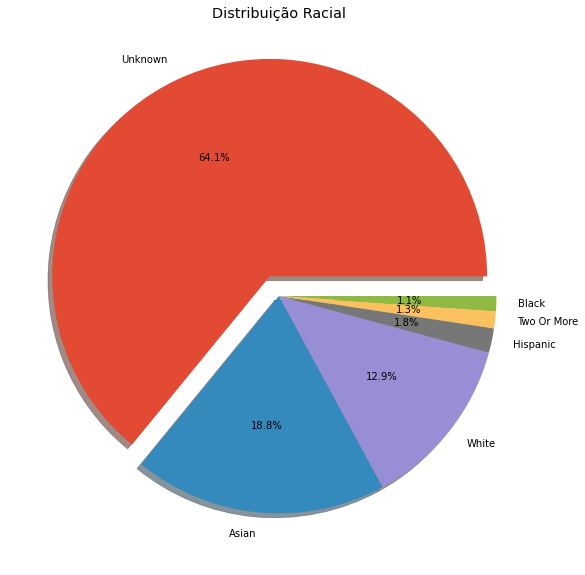

In [ ]:
# qual a distribuição de 'raça'?
# vamos criar um gráfico de setores para isso
indexes = dataset['race'].value_counts().index
values = dataset['race'].value_counts().values

plt.figure(figsize=(12,10))
plt.pie(values, labels=indexes,explode=[0.1,0,0,0,0,0], autopct='%.1f%%', shadow=True)

# 'autopct' = normalização dos termos
# shadow = sombreamento externo

plt.title('Distribuição Racial', loc='center') # loc = localização do título
plt.show()

In [ ]:
# qual a renda anual de cada gênero?
df7 = dataset[['total_yearly_compensation',
               'gender']].groupby('gender').mean().round(2).sort_values(by='total_yearly_compensation', ascending=False).reset_index()
df7

,gender,total_yearly_compensation
0,Other,231962.22
1,Unknown,230919.59
2,Male,212686.72
3,Female,195139.89


In [23]:
# qual a distribuição da compensação salarial anual?
# criaremos um histograma
ax = sns.histplot(data=dataset, x='total_yearly_compensation', kde=True)

# kde = kernel density estimation, desenha a linha do histograma

ax.set_xlim(1e3, 1e6) # editando os limites do eixo x (1e3=1000, 1e6=1.000.000)
plt.show()

ValueError: Could not interpret value `total_yearly_compensation` for parameter `x`

A partir do histograma acima, podemos supor com certo grau de confiança, que a distribuição para essa variável tem:

1. **forte assimetria à direita** (skew>0), pois os valores estão mais concentrados antes da mediana;
2. **curtose leptocúrtica forte** (kurt>0), já que visivelmente ela tem caudas pesadas.



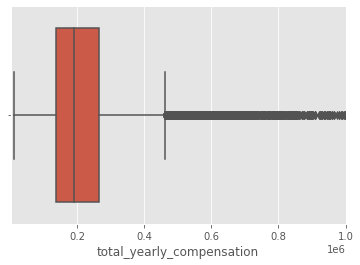

In [ ]:
# como fica isso em um boxplot?
ax = sns.boxplot(data=dataset, x='total_yearly_compensation')
ax.set_xlim(1e3, 1e6)
plt.show()

In [ ]:
print(round(skew(dataset['total_yearly_compensation']), 3)) # assimetria
print(round(kurtosis(dataset['total_yearly_compensation']), 3)) # curtose

4.52
87.117


Logo, podemos afirmar que nossas suposições sobre a distribuição da varivável estavam corretas, pois mostramos que a assimetria e a curtose são maiores do que 0.

In [ ]:
# mostre os dados dos 5 maiores salários masculinos
dataset.loc[dataset['gender'] == 'Male'].nlargest(5, 'total_yearly_compensation')

,company,title,base_salary,bonus,stock_grant_value,total_yearly_compensation,years_of_experience,years_at_company,gender,race,education,city,state,country
61991,facebook,Product Manager,380000.0,200000.0,4400.0,4980000,17.0,0.0,Male,Asian,Master's Degree,Menlo Park,CA,United States of America
61967,microsoft,Software Engineering Manager,850000.0,350000.0,3750.0,4950000,24.0,8.0,Male,Unknown,Unknown,Redmond,WA,United States of America
61982,google,Product Manager,450000.0,350000.0,3700.0,4500000,20.0,14.0,Male,Asian,Master's Degree,San Francisco,CA,United States of America
61969,snap,Software Engineering Manager,400000.0,0.0,2100.0,2500000,20.0,4.0,Male,Unknown,Unknown,Los Angeles,CA,United States of America
61987,facebook,Software Engineering Manager,315000.0,124000.0,1933.0,2372000,22.0,2.0,Male,Black,Master's Degree,Menlo Park,CA,United States of America


In [ ]:
# mostre os dados dos 5 maiores salários femininos
dataset.loc[dataset['gender'] == 'Female'].nlargest(5, 'total_yearly_compensation')

,company,title,base_salary,bonus,stock_grant_value,total_yearly_compensation,years_of_experience,years_at_company,gender,race,education,city,state,country
61984,zapier,Software Engineering Manager,250000.0,50000.0,1305.0,1605000,16.0,2.0,Female,White,Master's Degree,Denver,CO,United States of America
34812,google,Software Engineering Manager,380000.0,175000.0,800000.0,1355000,15.0,12.0,Female,Unknown,Master's Degree,Mountain View,CA,United States of America
16095,facebook,Product Manager,300000.0,100000.0,900000.0,1300000,19.0,1.0,Female,Unknown,Master's Degree,Menlo Park,CA,United States of America
26430,google,Product Manager,300000.0,90000.0,813000.0,1203000,21.0,0.0,Female,White,Master's Degree,Mountain View,CA,United States of America
61087,facebook,Product Manager,265000.0,66000.0,600000.0,931000,15.0,1.0,Female,Two Or More,Bachelor's Degree,New York,NY,United States of America


Realizando uma comparação a partir dos dataframes acima, podemos supor que há uma desvalorização salarial das mulheres frente aos homens.

In [ ]:
# quais são as empresas que pagam os 5 maiores salários?
dataset[['company',
         'total_yearly_compensation']].groupby('company').max().round(3).sort_values(by='total_yearly_compensation', ascending = False).head(5)

,total_yearly_compensation
company,
facebook,4980000
microsoft,4950000
google,4500000
snap,2500000
sofi,2000000


In [ ]:
# mostre a distribuição absoluta das raças em cada cargo
df8 = dataset[['race', 'title', 'total_yearly_compensation']].groupby(['title','race']).count().round(7)
df8.columns = ['Quantidade'] # renomeando a coluna do dataframe multiindex

pd.set_option('display.max_rows', None) # configuração para mostrar um display maior
df8

Quantidade
title                        race                   
Business Analyst             Asian               229
                             Black                21
                             Hispanic             26
                             Two Or More          20
                             Unknown             423
                             White               159
Data Scientist               Asian               501
                             Black                13
                             Hispanic             32
                             Two Or More          28
                             Unknown            1667
                             White               315
Hardware Engineer            Asian               575
                             Black                16
                             Hispanic             26
                             Two Or More          29
                             Unknown            1372
                             White               168
Human Resources              Asian                39
                             Black                25
                             Hispanic             14
                             Two Or More          10
                             Unknown             183
                             White                93
Management Consultant        Asian               177
                             Black                24
                             Hispanic             31
                             Two Or More          11
                             Unknown             516
                             White               213
Marketing                    Asian               108
                             Black                24
                             Hispanic             24
                             Two Or More          23
                             Unknown             334
                             White               196
Mechanical Engineer          Asian               124
                             Black                 4
                             Hispanic             16
                             Two Or More          10
                             Unknown             230
                             White               105
Product Designer             Asian               253
                             Black                33
                             Hispanic             38
                             Two Or More          33
                             Unknown             874
                             White               275
Product Manager              Asian               727
                             Black                49
                             Hispanic             72
                             Two Or More          66
                             Unknown            3139
                             White               586
Recruiter                    Asian                47
                             Black                17
                             Hispanic             24
                             Two Or More          17
                             Unknown             224
                             White               120
Sales                        Asian                62
                             Black                18
                             Hispanic             14
                             Two Or More           6
                             Unknown             236
                             White               124
Software Engineer            Asian              7799
                             Black               366
                             Hispanic            698
                             Two Or More         468
                             Unknown           26640
                             White              4754
Software Engineering Manager Asian               531
                             Black                21
              

In [ ]:
# comparação salarial pela média, para homens e mulheres em um cargo específico
salary_f = dataset.loc[(dataset['title'] == 'Software Engineer') & (dataset['gender'] == 'Female')]['base_salary'].mean()
salary_m = dataset.loc[(dataset['title'] == 'Software Engineer') & (dataset['gender'] == 'Male')]['base_salary'].mean()

print("Salários Masculino: {0};\nSalários Feminino: {1}".format(round(salary_m, 3), round(salary_f, 3)))

Salários Masculino: 131855.529;
Salários Feminino: 131103.126


In [ ]:
# como criar tabelas de contingência?
pd.crosstab(dataset['gender'], dataset['race'], margins=True, margins_name = 'Total')

race,Asian,Black,Hispanic,Two Or More,Unknown,White,Total
gender,,,,,,,
Female,2148,183,172,157,2933,1348,6941
Male,9433,492,939,594,17282,6570,35310
Other,21,3,7,37,286,43,397
Unknown,69,5,6,8,19223,28,19339
Total,11671,683,1124,796,39724,7989,61987
